(a)

i.

$W$ is a $m$ by $m$ diagonal matrix. The element at $i_{th}$ row and $i_{th}$ column is $w^{(i)}/2$.

ii.

$$
\begin{align}
\nabla_\theta J(\theta) &= \frac{1}{2}\nabla_\theta (X\theta - y)^T W (X\theta - y)
\\
&= \frac{1}{2}\nabla_\theta (\theta^T X^T W X \theta - \theta^T X^T W y - y^T WX\theta + yWy )
\end{align}
$$

Since $\theta^T X^T W y$ is just a number, it is equal to its transpose $y^T W^T X \theta$. From i we know $W^T = W$, so

$$
\begin{align}
\nabla_\theta J(\theta) &= \frac{1}{2}\nabla_\theta (\theta^T X^T W X \theta - 2y^T WX\theta)
\\
&=X^T WX\theta - X^T W^T y
\\
&=X^T WX\theta - X^T W y
\end{align}$$

where we used the result from problem set 0: $\nabla (\frac{1}{2}x^T A x + b^T x) = Ax + b$

Setting the gradient to 0, we get the normal equation for the weighted linear regression:

$$\theta = (X^T WX)^{-1} X^T W y$$

iii.

$$L = \prod_{i=i}^m p(y^{(i)} | x^{(i)};\theta)$$

$$l = \ln L = \sum_{i=1}^m \ln p(y^{(i)} | x^{(i)};\theta) = \sum_{i=1}^m (\ln \frac{1}{\sqrt{2\pi} \sigma^{(i)}} - \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2(\sigma^{(i)})^2})$$

$$\frac{\partial l}{\partial \theta_j} = \sum_{i=1}^m \frac{(y^{(i)} - \theta^T x^{(i)})}{(\sigma^{(i)})^2}x_j^{(i)}$$

Set the derivative to 0, we have

$$\sum_{i=1}^m x_j^{(i)} \frac{1}{(\sigma^{(i)})^2} (x^{(i)})^T \theta= \sum_{i=1}^m x_j^{(i)} \frac{1}{(\sigma^{(i)})^2}y^{(i)}$$

If we let $w^{(i)} = \frac{1}{(\sigma^{(i)})^2}$, then

$$\sum_{i=1}^m x_j^{(i)} w^{(i)} (x^{(i)})^T \theta= \sum_{i=1}^m x_j^{(i)} w^{(i)}y^{(i)}$$

which can be written in matrix form

$$X^T W X\theta = X^T W y$$

This is nothing but the normal equation derived in ii.

(b)

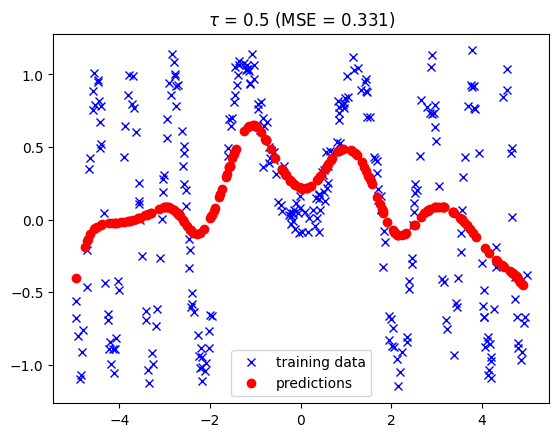

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import util
from p05b_lwr import main

train_path='../data/ds5_train.csv'
valid_path='../data/ds5_valid.csv'
test_path='../data/ds5_test.csv'

tao = 0.5

MSE = main(tao, train_path, valid_path)

The model seems to be underfitting.

(c)

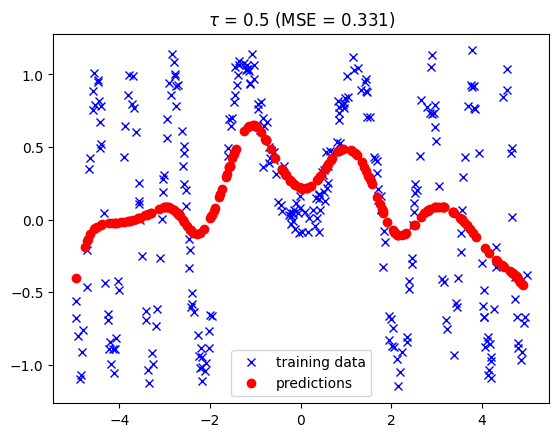

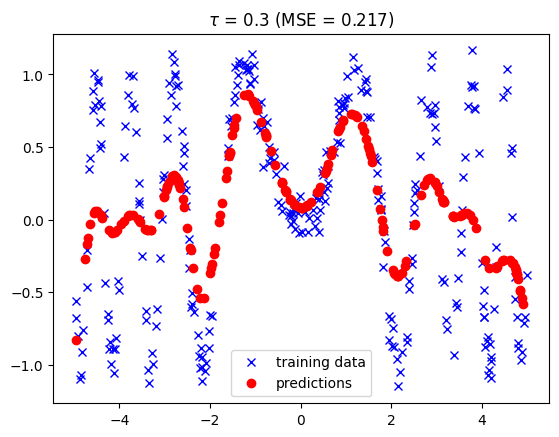

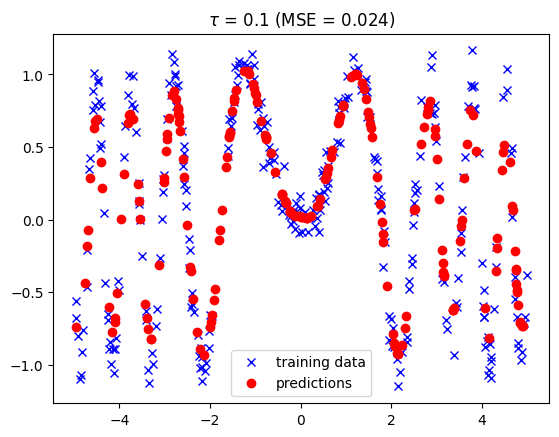

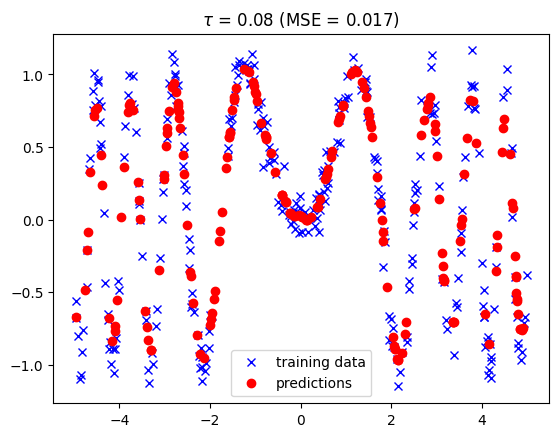

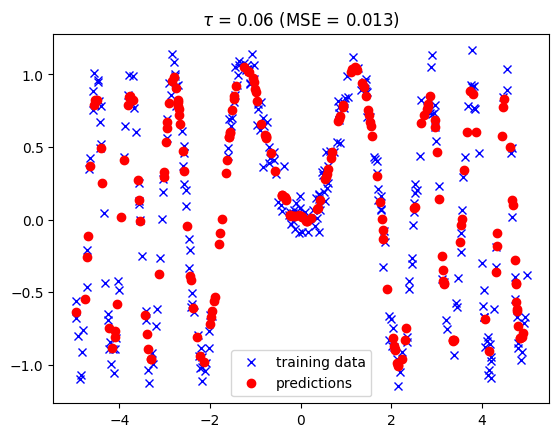

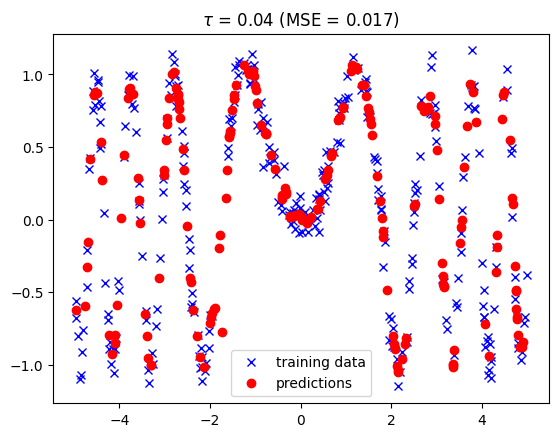

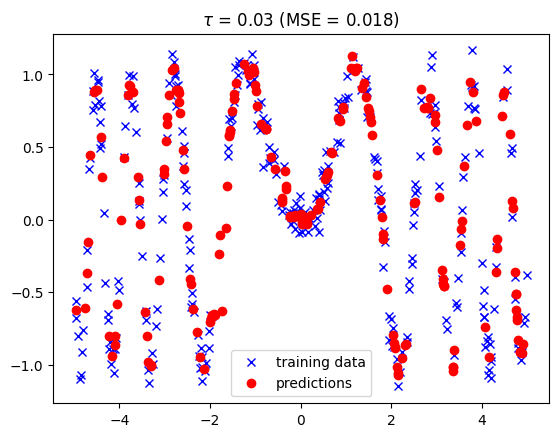

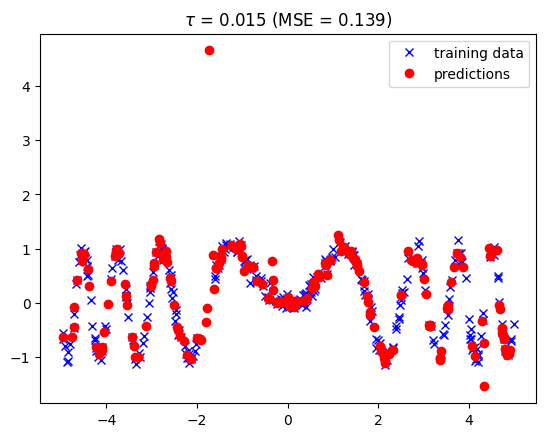

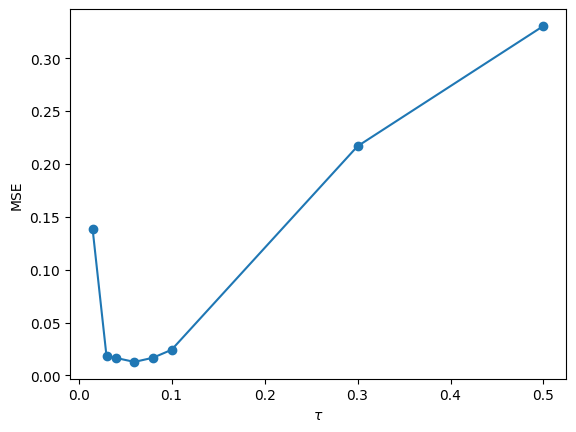

In [2]:
taos = [0.5, 0.3, 0.1, 0.08, 0.06, 0.04, 0.03, 0.015]
MSEs = []
for tao in taos:
    MSEs.append(main(tao, train_path, valid_path))
plt.plot(taos, MSEs,'-o')
plt.xlabel(r'$\tau$')
plt.ylabel('MSE')
plt.show()

We can see that $\tau = 0.06$ achieves the lowest MSE on the validation set. So let's use $\tau = 0.06$ on the test set.

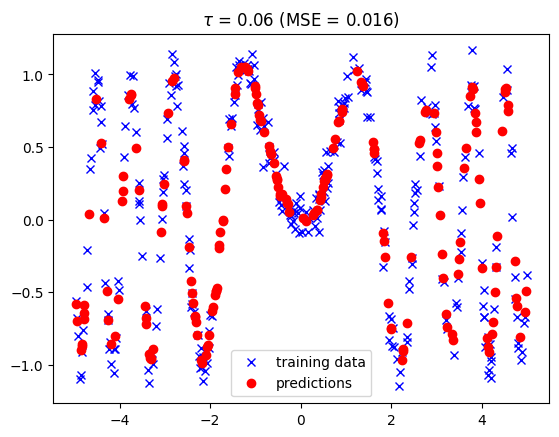

In [3]:
MSE_test = main(0.06, train_path, test_path)

Using $\tau=0.06$, the MSE on the test set is 0.016.